In [7]:
#basic package
import os
import numpy as np
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import math
import pickle #save and load dictionaries/lists
import glob

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

In [3]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
id_run = config.id_run
max_date_adaptability = config.max_date_adaptability
pal_tr = config.pal_treat

change the configuration file if not done yet!


In [4]:
name = 'OFH'

# download data

In [20]:
df_raw = pd.read_csv(os.path.join(path_extracted_data, 'OFH_df_MVT_simpler3_time.csv'), sep=',')
print(df_raw.shape)
df_raw.head(3)

(2123, 92)


,Unnamed: 0,HenID,level,verification_daily_total_duration,verification_daily_total_nbr_hour,dur_values,perc_duration_3_Zone,perc_duration_4_Zone,perc_duration_5_Zone,perc_duration_2_Zone,...,Sleeping_Uppest,dico_indoorZ_prop,propindoor_duration_2_Zone,propindoor_duration_3_Zone,propindoor_duration_4_Zone,propindoor_duration_5_Zone,sum_prop,time,time2_,time2
0,1,hen_140,2020-10-04,32400,9,"[0.0, 11108.0, 6823.0, 10870.0, 3599.0]",21,34,11,34,...,1,"{'Z2': 0.33999999999999986, 'Z3': 0.21, 'Z4': ...",0.340000,0.210000,0.340000,0.110000,1,0.085631,0.007333,0.001923
1,2,hen_140,2020-10-11,36000,10,"[0.0, 21623.0, 9653.0, 1591.0, 3133.0]",27,4,9,60,...,0,"{'Z2': 0.6, 'Z3': 0.27, 'Z4': 0.04, 'Z5': 0.09}",0.600000,0.270000,0.040000,0.090000,1,0.171263,0.029331,0.007692
2,3,hen_140,2020-10-18,39600,11,"[4186.0, 14911.0, 7280.0, 5325.0, 7898.0]",18,13,20,38,...,0,"{'Z2': 0.4269670000000001, 'Z3': 0.202247, 'Z4...",0.426967,0.202247,0.146067,0.224719,1,0.256894,0.065995,0.017306


In [21]:
li_df = []
for path_df_ in glob.glob(os.path.join(path_extracted_data,'OFH_*_df_pred_all_moreit.csv')):
    
    #prediction
    df_pred = pd.read_csv(path_df_, sep=',')
    print(df_pred.shape)
    display(df_pred.head(3))
    
    #data which rpediction was based on
    df_newdata = pd.read_csv(path_df_.replace('df_pred_','df_newdata_'), sep=',')
    print(df_newdata.shape)
    display(df_newdata.head(3))
    
    #concat both and save it in the list
    df_ = pd.concat([df_newdata, df_pred], axis=1)
    print(df_.shape)
    df_.head(3)
    li_df.append(df_)
    
df = pd.concat(li_df)
dico_time_WIB = dict(zip(df_raw['time'],df_raw['WIB']))
df['WIB'] = df['time'].map(lambda x: dico_time_WIB[x])
print(df.shape)
df.head(3)

(30420, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.112807,0.093118,0.005780,0.349281,0.451082,0.152495,0.167526,0.748553,0.265541,0.135454,0.049856,0.567414,0.170570,0.114126,0.012193,0.436209
1,2,0.086979,0.083653,0.001634,0.305564,0.463282,0.141053,0.206132,0.745854,0.338538,0.133336,0.112323,0.618701,0.111201,0.089660,0.005385,0.350401
2,3,0.070591,0.071680,0.000731,0.265256,0.221585,0.132328,0.026362,0.515459,0.155091,0.117195,0.009748,0.446252,0.552733,0.163035,0.229377,0.858984


(30420, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen10,hen_140,0.085631,0.001923,TRAN
1,2,TRAN,pen10,hen_140,0.085631,0.001923,TRAN
2,3,OFH,pen10,hen_192,0.085631,0.001923,TRAN


(30420, 24)
(36504, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.086864,0.079719,0.002392,0.288946,0.275382,0.129000,0.062971,0.557974,0.266618,0.126823,0.065347,0.554870,0.371135,0.138727,0.124100,0.652110
1,2,0.075242,0.076665,0.000607,0.281829,0.285767,0.139071,0.059909,0.578542,0.380623,0.157032,0.105420,0.693657,0.258368,0.139738,0.039194,0.565352
2,3,0.114375,0.088251,0.006074,0.333090,0.350184,0.133407,0.113508,0.626303,0.239493,0.122124,0.047784,0.510986,0.295948,0.128683,0.078679,0.571514


(36504, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen11,hen_108,0.085631,0.001923,OFH
1,2,TRAN,pen11,hen_108,0.085631,0.001923,OFH
2,3,OFH,pen11,hen_112,0.085631,0.001923,OFH


(36504, 24)
(24336, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.076046,0.076333,0.001066,0.287528,0.165659,0.112339,0.012113,0.435166,0.144337,0.109565,0.007346,0.414769,0.613958,0.161489,0.276699,0.890166
1,2,0.076555,0.077608,0.000633,0.281082,0.199876,0.115251,0.031558,0.458261,0.222211,0.117217,0.041800,0.481499,0.501359,0.144387,0.228537,0.782014
2,3,0.117976,0.092104,0.005451,0.346672,0.216023,0.123595,0.026820,0.496184,0.140653,0.105442,0.007229,0.390428,0.525348,0.161954,0.207577,0.836005


(24336, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen12,hen_122,0.085631,0.001923,TRAN
1,2,TRAN,pen12,hen_122,0.085631,0.001923,TRAN
2,3,OFH,pen12,hen_137,0.085631,0.001923,TRAN


(24336, 24)
(30420, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.043706,0.057554,0.000033,0.206849,0.048597,0.060588,0.000048,0.218841,0.024183,0.045237,4.933963e-08,0.159685,0.883514,0.091950,0.653149,0.993011
1,2,0.051539,0.063677,0.000048,0.239690,0.072625,0.076108,0.000326,0.278778,0.044554,0.061184,7.316686e-06,0.211929,0.831282,0.113027,0.552238,0.986691
2,3,0.069853,0.071383,0.001031,0.269402,0.233152,0.120335,0.047212,0.497291,0.225837,0.118087,4.342848e-02,0.490871,0.471157,0.146327,0.200824,0.750930


(30420, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen3,hen_15,0.085631,0.001923,OFH
1,2,TRAN,pen3,hen_15,0.085631,0.001923,OFH
2,3,OFH,pen3,hen_163,0.085631,0.001923,OFH


(30420, 24)
(33462, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.085320,0.082014,0.001038,0.300524,0.138510,0.106384,0.005676,0.399672,0.125281,0.101079,0.004202,0.373064,0.650889,0.155544,0.331278,0.918807
1,2,0.083252,0.077705,0.001693,0.280567,0.172248,0.110384,0.018575,0.435831,0.202219,0.114329,0.032124,0.457828,0.542280,0.143014,0.262809,0.803260
2,3,0.049587,0.060887,0.000041,0.227093,0.120731,0.096064,0.004882,0.359994,0.060528,0.069831,0.000085,0.252732,0.769155,0.131758,0.466960,0.966555


(33462, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen4,hen_144,0.085631,0.001923,TRAN
1,2,TRAN,pen4,hen_144,0.085631,0.001923,TRAN
2,3,OFH,pen4,hen_152,0.085631,0.001923,TRAN


(33462, 24)
(30420, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.086255,0.080206,0.002238,0.289453,0.307357,0.133578,0.088881,0.593873,0.211283,0.115634,0.038294,0.463926,0.395105,0.138661,0.147106,0.699956
1,2,0.075110,0.077951,0.000652,0.289601,0.338181,0.153905,0.076602,0.647829,0.310636,0.151140,0.068069,0.633319,0.276073,0.148367,0.044136,0.618840
2,3,0.071314,0.074774,0.000577,0.275283,0.251958,0.125994,0.055261,0.528546,0.228531,0.119606,0.042889,0.492783,0.448197,0.146004,0.175142,0.733201


(30420, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen5,hen_107,0.085631,0.001923,OFH
1,2,TRAN,pen5,hen_107,0.085631,0.001923,OFH
2,3,OFH,pen5,hen_167,0.085631,0.001923,OFH


(30420, 24)
(30420, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.047935,0.059572,0.000020,0.214417,0.102322,0.089810,0.002436,0.335427,0.037443,0.056493,7.684277e-07,0.192042,0.812299,0.123504,0.518645,0.982380
1,2,0.053883,0.063580,0.000155,0.234773,0.138621,0.096684,0.010089,0.379687,0.065114,0.073901,3.907373e-04,0.268627,0.742382,0.124002,0.467649,0.939368
2,3,0.131717,0.100039,0.007738,0.383705,0.346940,0.146365,0.101748,0.651852,0.201929,0.127903,2.358767e-02,0.504180,0.319414,0.154174,0.074828,0.649927


(30420, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen8,hen_126,0.085631,0.001923,TRAN
1,2,TRAN,pen8,hen_126,0.085631,0.001923,TRAN
2,3,OFH,pen8,hen_127,0.085631,0.001923,TRAN


(30420, 24)
(21294, 17)


,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,Q2.5.propindoor_duration_4_Zone,Q97.5.propindoor_duration_4_Zone,Estimate.propindoor_duration_2_Zone,Est.Error.propindoor_duration_2_Zone,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,0.066293,0.070984,0.000520,0.256883,0.086013,0.079586,0.002158,0.293594,0.055083,0.064600,0.000241,0.227216,0.792611,0.113544,0.541997,0.962733
1,2,0.073535,0.077995,0.000775,0.273424,0.122297,0.095290,0.004859,0.358396,0.104895,0.094980,0.002242,0.340647,0.699274,0.148263,0.370880,0.934240
2,3,0.096641,0.083507,0.003277,0.317558,0.321081,0.132707,0.092443,0.604856,0.157780,0.103616,0.015902,0.409500,0.424499,0.143228,0.159409,0.711113


(21294, 7)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1
0,1,OFH,pen9,hen_120,0.085631,0.001923,OFH
1,2,TRAN,pen9,hen_120,0.085631,0.001923,OFH
2,3,OFH,pen9,hen_164,0.085631,0.001923,OFH


(21294, 24)
(237276, 24)


,Unnamed: 0,Treatment,PenID,HenID,time,time2,Treatment.1,Unnamed: 0,Estimate.propindoor_duration_4_Zone,Est.Error.propindoor_duration_4_Zone,...,Q2.5.propindoor_duration_2_Zone,Q97.5.propindoor_duration_2_Zone,Estimate.propindoor_duration_3_Zone,Est.Error.propindoor_duration_3_Zone,Q2.5.propindoor_duration_3_Zone,Q97.5.propindoor_duration_3_Zone,Estimate.propindoor_duration_5_Zone,Est.Error.propindoor_duration_5_Zone,Q2.5.propindoor_duration_5_Zone,Q97.5.propindoor_duration_5_Zone
0,1,OFH,pen10,hen_140,0.085631,0.001923,TRAN,1,0.112807,0.093118,...,0.167526,0.748553,0.265541,0.135454,0.049856,0.567414,0.170570,0.114126,0.012193,0.436209
1,2,TRAN,pen10,hen_140,0.085631,0.001923,TRAN,2,0.086979,0.083653,...,0.206132,0.745854,0.338538,0.133336,0.112323,0.618701,0.111201,0.089660,0.005385,0.350401
2,3,OFH,pen10,hen_192,0.085631,0.001923,TRAN,3,0.070591,0.071680,...,0.026362,0.515459,0.155091,0.117195,0.009748,0.446252,0.552733,0.163035,0.229377,0.858984


## Visual

In [35]:
df_plt = pd.melt(df, id_vars=['WIB','Treatment','HenID'], value_vars=['Estimate.propindoor_duration_2_Zone', 
                                                                      'Estimate.propindoor_duration_3_Zone',
                                                                      'Estimate.propindoor_duration_4_Zone',
                                                                      'Estimate.propindoor_duration_5_Zone'], 
                 value_name = 'prediction')
#match the name fro the raw data
df_plt['variable'] = df_plt['variable'].map(lambda x: x.replace('Estimate.propindoor_dur','propindoor_dur'))
df_plt.head(3)

,WIB,Treatment,HenID,variable,prediction
0,1,OFH,hen_140,propindoor_duration_2_Zone,0.451082
1,1,TRAN,hen_140,propindoor_duration_2_Zone,0.463282
2,1,OFH,hen_192,propindoor_duration_2_Zone,0.221585


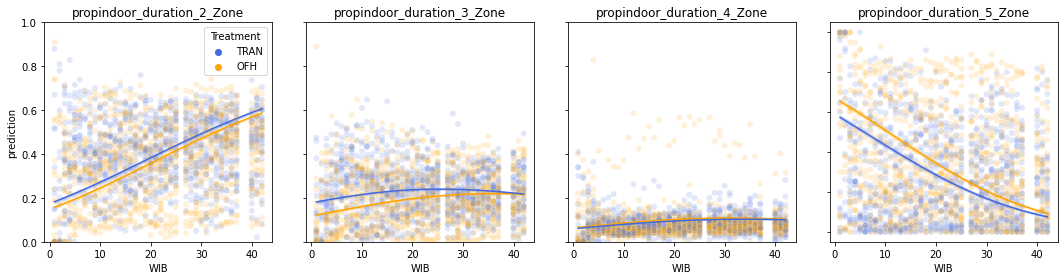

In [36]:
fig = plt.figure(figsize=(15, 4))
for i,(v, df_plt_) in enumerate(df_plt.groupby(['variable'])):
    plt.ylim((0,1))
    ax = plt.subplot(1,4,i+1)
    plt.tight_layout()
    #dont show y axis on all plot except the first one
    if i!=0:
        plt.setp(ax.get_yticklabels(), visible=False) 
        sns.lineplot(x='WIB',y='prediction',data=df_plt_, hue='Treatment', palette=pal_tr, legend=False)
        sns.scatterplot(x='WIB',y=v,data=df_raw, hue='Treatment', palette=pal_tr, alpha=0.15, legend=False)
    else:
        sns.lineplot(x='WIB',y='prediction',data=df_plt_, hue='Treatment', palette=pal_tr, legend=False)
        sns.scatterplot(x='WIB',y=v,data=df_raw, hue='Treatment', palette=pal_tr, alpha=0.15, legend=True)
    plt.title(v)
    #plt.show();
plt.savefig(os.path.join(path_extracted_data, name+'_indoozone_proportion_usage_moreit.png'),
                dpi=300,format='png',bbox_inches='tight')
plt.show();

#IN CASE: one plot at a time
for v, df_plt_ in df_plt.groupby(['variable']):
    #plt.ylim((0.05,0.5))
    sns.lineplot('WIB','prediction',data=df_plt_, hue='Treatment', palette=pal_tr)
    sns.scatterplot('WIB',v,data=df_raw, hue='Treatment', palette=pal_tr, alpha=0.1)
    plt.title(v)
    plt.show();